<a href="https://colab.research.google.com/github/Gaurav1921/Data-Science-Projects/blob/master/Space-O-Analytics%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **<center>Luminosity-Radius-Temperature Relation</center>**

The Luminosity-Radius-Temperature Relation for stars states that: "The Luminosity of a star is proportional to its Effective Temperature to the 4th power and its Radius squared."


---

A star's luminosity, or the total amount of energy it emits each second, is determined by two factors:

1.   The entire surface area of the star, which is influenced by its radius, R.

2.   The "Effective Temperature" of the stellar photosphere, T.

---

As hot, dense balls of gas, stars emit roughly blackbody radiation continuously and follow the Stefan-Boltzmann Law:

> **Energy/sec/Area -> F = σ T^4**

This equation connects the star's temperature to the quantity of energy released every second from each square metre of its surface (the flux F) (T).

The total surface area of a spherical star (with radius R) is:

> **Area = 4 π R^2**

Inferring the results of both equations together, the total stellar luminosity (energy emitted each second) is therefore


> **L = F x Area = (4 π R^2) (σ T^4)**

Therefore this is the Luminosity-Radius-Temperature Relation for stars.

---
HYPOTHESIS:  

Now we will try to visualize it graphically to verify if the above hypothesis is true or not. We will term it true if the anaylsis finds out that from the given dataset that the correlation is more than 75%, then the above hypothesis would be termed as TRUE.


In [206]:
# importing important libraries necessary for data analysis

import pandas as pd
from matplotlib import pyplot as plt, cm
import seaborn as sns

In [207]:
# importing dataset into local file

df = pd.read_csv('/content/dataset.csv')
df.head()

,source_id,mh_gspphot,distance_gspphot,radius_gspphot,vsini_esphs,radius_flame,lum_flame,mass_flame,age_flame,gravredshift_flame,parallax,l,b,ecl_lon,ecl_lat,teff_gspphot,logg_gspphot
0,1892971994938385152,-0.2297,1913.2518,0.6903,NaN,0.685477,0.305313,NaN,NaN,0.715506,0.348986,82.165025,-21.853855,343.535985,36.554186,5186.1343,4.6501
1,1892971994938390912,-1.1103,1414.8071,0.4954,NaN,0.502544,0.109534,NaN,NaN,0.740547,0.480361,82.164878,-21.848257,343.533972,36.559548,4688.9214,4.7918
2,1892971999234781312,0.0661,1411.8239,0.7323,NaN,0.712528,0.286425,NaN,NaN,0.700343,0.427786,82.164935,-21.851485,343.535102,36.556449,4999.6910,4.6251
3,1892972098017629696,-0.9274,1215.6301,0.5737,NaN,0.800931,0.261453,0.740356,7.046982,0.620988,0.573415,82.178600,-21.832551,343.544076,36.578069,4617.4937,4.6663
4,1892972102313998080,-0.7981,1557.3232,0.6925,NaN,0.689407,0.405947,NaN,NaN,0.652070,0.316721,82.172188,-21.843375,343.540505,36.566054,5549.7350,4.6039


In [208]:
# checking the names of the columns

df.columns

Index(['source_id', 'mh_gspphot', 'distance_gspphot', 'radius_gspphot',
       'vsini_esphs', 'radius_flame', 'lum_flame', 'mass_flame', 'age_flame',
       'gravredshift_flame', 'parallax', 'l', 'b', 'ecl_lon', 'ecl_lat',
       'teff_gspphot', 'logg_gspphot'],
      dtype='object')

In [209]:
# Checking the shape of the dataset

df.shape

(147636, 17)

In [210]:
# Extracting basic info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147636 entries, 0 to 147635
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   source_id           147636 non-null  int64  
 1   mh_gspphot          147636 non-null  float64
 2   distance_gspphot    147636 non-null  float64
 3   radius_gspphot      147636 non-null  float64
 4   vsini_esphs         104 non-null     float64
 5   radius_flame        147636 non-null  float64
 6   lum_flame           147636 non-null  float64
 7   mass_flame          83564 non-null   float64
 8   age_flame           79521 non-null   float64
 9   gravredshift_flame  147636 non-null  float64
 10  parallax            147636 non-null  float64
 11  l                   147636 non-null  float64
 12  b                   147636 non-null  float64
 13  ecl_lon             147636 non-null  float64
 14  ecl_lat             147636 non-null  float64
 15  teff_gspphot        147636 non-nul

In [211]:
# Understanding the basic stats of the data

df.describe()

,source_id,mh_gspphot,distance_gspphot,radius_gspphot,vsini_esphs,radius_flame,lum_flame,mass_flame,age_flame,gravredshift_flame,parallax,l,b,ecl_lon,ecl_lat,teff_gspphot,logg_gspphot
count,1.476360e+05,147636.000000,147636.000000,147636.000000,104.000000,147636.000000,147636.000000,83564.000000,79521.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000
mean,1.895640e+18,-0.547239,1479.805052,1.071527,85.076417,1.074612,2.365069,0.923987,6.373101,0.596880,0.780890,85.163179,-20.783191,346.583013,38.209715,5031.641598,4.468035
std,1.465586e+15,0.527875,853.941043,2.453623,59.874753,1.839009,30.354777,0.372751,3.772357,0.131076,0.870726,2.285507,1.646300,2.958844,1.367978,686.522622,0.356595
min,1.892972e+18,-4.094300,26.960800,0.164700,0.272024,0.072414,0.002765,0.501730,0.200046,0.002954,-0.017029,81.611368,-24.375435,341.385072,34.876157,2979.154000,0.167400
25%,1.894377e+18,-0.852700,1008.858200,0.612600,35.267893,0.623485,0.183361,0.725922,3.184903,0.554355,0.348950,83.195804,-21.969235,343.989886,37.156361,4585.482250,4.390900
50%,1.895770e+18,-0.500350,1393.641200,0.735900,82.998692,0.764071,0.319343,0.846745,5.789761,0.632125,0.559921,84.820109,-20.876400,346.103051,38.174735,5091.627350,4.565500
75%,1.896933e+18,-0.163000,1804.278400,0.958200,119.156746,1.019875,0.773069,0.993028,9.660863,0.685930,0.897559,87.123169,-19.489253,349.240662,39.247365,5461.375250,4.671625
max,1.897959e+18,0.798800,20662.037000,383.998400,268.565640,163.556800,3441.961200,7.994837,13.499963,1.583271,37.059133,89.766950,-17.331883,352.502046,41.254695,19983.633000,5.143500


In [212]:
# To know the percentage of null values in the dataset

(df.isnull().sum() / len(df)) * 100

source_id              0.000000
mh_gspphot             0.000000
distance_gspphot       0.000000
radius_gspphot         0.000000
vsini_esphs           99.929556
radius_flame           0.000000
lum_flame              0.000000
mass_flame            43.398629
age_flame             46.137121
gravredshift_flame     0.000000
parallax               0.000000
l                      0.000000
b                      0.000000
ecl_lon                0.000000
ecl_lat                0.000000
teff_gspphot           0.000000
logg_gspphot           0.000000
dtype: float64

In [213]:
# Dropping the column with more than 40% null values

df.drop(['mass_flame', 'age_flame', 'vsini_esphs'], axis = 1, inplace = True)

In [214]:
# Reaffirming if we have any other Null vlaues in the dataset

df.isnull().sum()

source_id             0
mh_gspphot            0
distance_gspphot      0
radius_gspphot        0
radius_flame          0
lum_flame             0
gravredshift_flame    0
parallax              0
l                     0
b                     0
ecl_lon               0
ecl_lat               0
teff_gspphot          0
logg_gspphot          0
dtype: int64

In [215]:
# Checking the correlation of the dataset to understand which columns are highly correlated  

df.corr()

,source_id,mh_gspphot,distance_gspphot,radius_gspphot,radius_flame,lum_flame,gravredshift_flame,parallax,l,b,ecl_lon,ecl_lat,teff_gspphot,logg_gspphot
source_id,1.000000,-0.022555,0.030324,0.003709,0.002569,-0.001950,0.004458,-0.034903,-0.369235,0.856438,-0.467772,0.879044,0.014574,-0.003467
mh_gspphot,-0.022555,1.000000,-0.208488,0.093085,0.116024,0.030566,-0.171457,0.300950,0.017127,-0.018699,0.018866,-0.016790,-0.217873,-0.227460
distance_gspphot,0.030324,-0.208488,1.000000,0.357167,0.331978,0.214368,-0.196825,-0.487127,-0.000529,0.033933,-0.005546,0.039264,0.403976,-0.434084
radius_gspphot,0.003709,0.093085,0.357167,1.000000,0.873356,0.691462,-0.420430,-0.047583,0.001875,0.002047,0.001325,0.002934,0.053391,-0.617243
radius_flame,0.002569,0.116024,0.331978,0.873356,1.000000,0.797805,-0.495039,-0.066620,-0.001333,0.002531,-0.001583,0.002545,0.081529,-0.701346
lum_flame,-0.001950,0.030566,0.214368,0.691462,0.797805,1.000000,-0.195002,-0.027793,0.000178,-0.001546,0.000470,-0.001728,0.046776,-0.339262
gravredshift_flame,0.004458,-0.171457,-0.196825,-0.420430,-0.495039,-0.195002,1.000000,-0.084509,-0.013529,0.006687,-0.012941,0.003297,-0.042669,0.867441
parallax,-0.034903,0.300950,-0.487127,-0.047583,-0.066620,-0.027793,-0.084509,1.000000,0.029389,-0.043469,0.032983,-0.041325,-0.346658,0.064142
l,-0.369235,0.017127,-0.000529,0.001875,-0.001333,0.000178,-0.013529,0.029389,1.000000,-0.623214,0.992244,-0.406094,-0.005972,-0.009382
b,0.856438,-0.018699,0.033933,0.002047,0.002531,-0.001546,0.006687,-0.043469,-0.623214,1.000000,-0.713764,0.967253,0.018295,-0.003965


Since we can see that there have been correlation of more than 95% between column name 'b' & 'ecl_lat'. Therefore I have removed the column 'b' from the dataset.

In [216]:
# dropping columns which have correlation coefficient of more than 70%

df.drop(['b', 'radius_gspphot', 'logg_gspphot'], axis=1, inplace = True)

In [217]:
# checking the shape of the dataset after data preprocessing

df.shape

(147636, 11)

In [218]:
df.corr()

,source_id,mh_gspphot,distance_gspphot,radius_flame,lum_flame,gravredshift_flame,parallax,l,ecl_lon,ecl_lat,teff_gspphot
source_id,1.000000,-0.022555,0.030324,0.002569,-0.001950,0.004458,-0.034903,-0.369235,-0.467772,0.879044,0.014574
mh_gspphot,-0.022555,1.000000,-0.208488,0.116024,0.030566,-0.171457,0.300950,0.017127,0.018866,-0.016790,-0.217873
distance_gspphot,0.030324,-0.208488,1.000000,0.331978,0.214368,-0.196825,-0.487127,-0.000529,-0.005546,0.039264,0.403976
radius_flame,0.002569,0.116024,0.331978,1.000000,0.797805,-0.495039,-0.066620,-0.001333,-0.001583,0.002545,0.081529
lum_flame,-0.001950,0.030566,0.214368,0.797805,1.000000,-0.195002,-0.027793,0.000178,0.000470,-0.001728,0.046776
gravredshift_flame,0.004458,-0.171457,-0.196825,-0.495039,-0.195002,1.000000,-0.084509,-0.013529,-0.012941,0.003297,-0.042669
parallax,-0.034903,0.300950,-0.487127,-0.066620,-0.027793,-0.084509,1.000000,0.029389,0.032983,-0.041325,-0.346658
l,-0.369235,0.017127,-0.000529,-0.001333,0.000178,-0.013529,0.029389,1.000000,0.992244,-0.406094,-0.005972
ecl_lon,-0.467772,0.018866,-0.005546,-0.001583,0.000470,-0.012941,0.032983,0.992244,1.000000,-0.513970,-0.007892
ecl_lat,0.879044,-0.016790,0.039264,0.002545,-0.001728,0.003297,-0.041325,-0.406094,-0.513970,1.000000,0.019345


In [219]:
# Binning the labels for 'lum_flame' based on the lumiousity of stars for quality visualization

bins = [0, 0.2, 0.5, 1, 6]
labels = ['grey', 'silver', 'whitesmoke', 'snow']

df['Color'] = pd.cut(df['lum_flame'], bins=bins, labels=labels)

In [220]:
# checking the total value counts of each labels binned in the 'Color' column

df['Color'].value_counts()

silver        54717
grey          42015
snow          25931
whitesmoke    19985
Name: Color, dtype: int64

In [221]:
# now checking for any unique values present in the dataset

df.nunique()

source_id             147636
mh_gspphot             24228
distance_gspphot      144016
radius_flame          146844
lum_flame             147400
gravredshift_flame    145631
parallax              147636
l                     147636
ecl_lon               147636
ecl_lat               147636
teff_gspphot          133611
Color                      4
dtype: int64

In [222]:
# checking for any duplicity in the dataset

df.duplicated().sum()

0

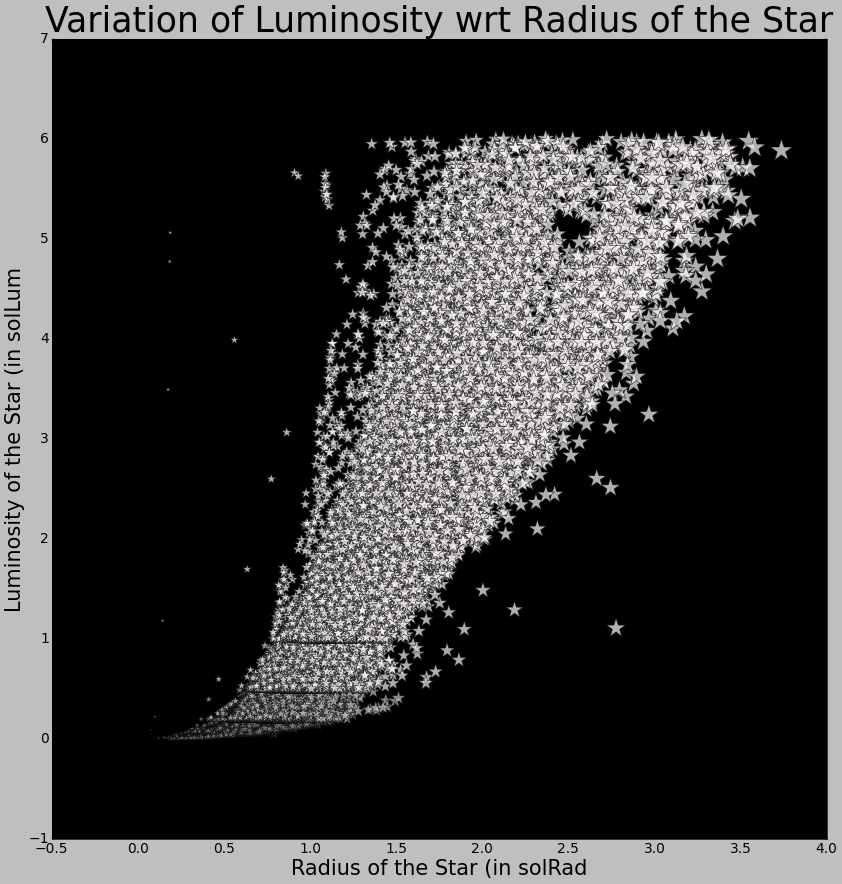

In [223]:
# Checking if the above hypothesis is true or not through graphical method

plt.figure(figsize=(20, 20), dpi=50)
ax = plt.axes()
ax.set_facecolor('black')

plt.scatter(df['radius_flame'][df['Color']=='grey'], df['lum_flame'][df['Color']=='grey'], s=list(df['radius_flame'][df['Color']=='grey']*300), c='grey', marker = '*', alpha = 0.7)
plt.scatter(df['radius_flame'][df['Color']=='silver'], df['lum_flame'][df['Color']=='silver'], s=list(df['radius_flame'][df['Color']=='silver']*300), c='silver', marker = '*', alpha = 0.7)
plt.scatter(df['radius_flame'][df['Color']=='whitesmoke'], df['lum_flame'][df['Color']=='whitesmoke'], s=list(df['radius_flame'][df['Color']=='whitesmoke']*300), c='whitesmoke', marker = '*', alpha = 0.7)
plt.scatter(df['radius_flame'][df['Color']=='snow'], df['lum_flame'][df['Color']=='snow'], s=list(df['radius_flame'][df['Color']=='snow']*300), c='snow', marker = '*', alpha = 0.7)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.title('Variation of Luminosity wrt Radius of the Star', fontsize = 50)
plt.xlabel('Radius of the Star (in solRad', fontsize = 30)
plt.ylabel('Luminosity of the Star (in solLum', fontsize = 30)
plt.show()

<center>We could see that as the mass of the stars are 80% correlated to how lumminousity of the stars.

### **Therefore, we could see that as the radius of the stars increase their luminosity increases too, which in turn proves our hypothesis to be true.</center>**